<a href="https://colab.research.google.com/github/Jacksonpardo/datos/blob/main/TRABAJO_DE_ANALISIS_DE_DATA%20CORAZ%C3%93N_CON_PYTHON_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data de corazón

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor as KNr
import plotly.graph_objects as go
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split as tts


print('A continuación se presenta una data dataset pacientes UCI para diagnóstico de enfermedad al corazón')
print('')
print('1.age (age in years)')
print('2.sex (1 = male; 0 = female)')
print('3.cp (chest pain type)')
print('4.trestbps(resting blood pressure (in mm Hg on admission to the hospital))')
print('5.chol (serum cholestoral in mg/dl)')
print('6.fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)')
print('7.restecg (resting electrocardiographic results)')
print('8.thalach (maximum heart rate achieved)')
print('9.exang (exercise induced angina (1 = yes; 0 = no))')
print('10.oldpeak (ST depression induced by exercise relative to rest)')
print('11.slope (the slope of the peak exercise ST segment)')
print('12.ca (number of major vessels (0-3) colored by flourosopy)')
print('13.thal (3 = normal; 6 = fixed defect; 7 = reversable defect)')
print('14.target (1 or 0)')
print('')
print('El modelo a ejecutar es de tipo KNN y realiza predicción del nivel de colesterol a partir de la edad')
print('')
heart_df=pd.read_csv('https://raw.githubusercontent.com/manuelrey94/PYTHON-TRABAJO/main/heart.csv')
heart_df

A continuación se presenta una data dataset pacientes UCI para diagnóstico de enfermedad al corazón

1.age (age in years)
2.sex (1 = male; 0 = female)
3.cp (chest pain type)
4.trestbps(resting blood pressure (in mm Hg on admission to the hospital))
5.chol (serum cholestoral in mg/dl)
6.fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7.restecg (resting electrocardiographic results)
8.thalach (maximum heart rate achieved)
9.exang (exercise induced angina (1 = yes; 0 = no))
10.oldpeak (ST depression induced by exercise relative to rest)
11.slope (the slope of the peak exercise ST segment)
12.ca (number of major vessels (0-3) colored by flourosopy)
13.thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.target (1 or 0)

El modelo a ejecutar es de tipo KNN y realiza predicción del nivel de colesterol a partir de la edad



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#Gráficas

In [2]:
import pandas
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

dataset = pandas.read_csv("https://raw.githubusercontent.com/manuelrey94/PYTHON-TRABAJO/ac9ff7a33b76166d39b6dfd6e4fc0c66289b3c3b/heart.csv")
dataset.head()
x_edad = list(dataset['age'])
y_trestbps = list(dataset['trestbps'])
fig1 = px.scatter(x = x_edad, y= y_trestbps , color_discrete_sequence=['rgb(255,0,0)'])
fig1.show()

In [4]:
import pandas
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

dataset = pandas.read_csv("https://raw.githubusercontent.com/manuelrey94/PYTHON-TRABAJO/ac9ff7a33b76166d39b6dfd6e4fc0c66289b3c3b/heart.csv")
dataset.head()
x_edad = list(dataset['age'])
y_thalach = list(dataset['thalach'])
fig1 = px.scatter(x = x_edad, y= y_thalach , color_discrete_sequence=['rgb(255,0,0)'])
fig1.show()

In [5]:
fig4 = px.scatter(dataset, x = 'age',y  = 'trestbps', color = 'sex',facet_col ='cp')
fig4.show()

In [6]:
fig5 = px.scatter(dataset, x = 'age',y  = 'chol', color = 'sex',facet_col ='cp')
fig5.show()

In [7]:
fig6 = px.scatter(dataset, x = 'age',y  = 'thalach', color = 'sex',facet_col ='cp')
fig6.show()

In [8]:
fig7 = px.scatter(dataset, x = 'age',y  = 'oldpeak', color = 'sex',facet_col ='cp')
fig7.show()

#Datos estadísticos

In [9]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
import plotly.express as px
import numpy as np
df_heart = pd.read_csv('https://raw.githubusercontent.com/manuelrey94/PYTHON-TRABAJO/main/heart.csv')
t= np.linspace(0,np.pi)
fig3 = px.line(x=t, y= np.sin(t), labels={'x':'age', 'y':'trestbps'})
fig3.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2f6f93ad0>,
      dtype=object)

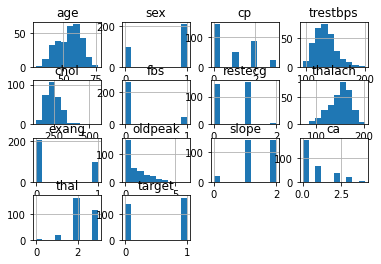

In [12]:
dataset.hist()

In [22]:
fig1= px.scatter(dataset, x= 'age', y= 'trestbps', trendline = 'ols')
fig1.show()

In [35]:
import plotly.figure_factory as ff

target_arr_list=[np.array(dataset['age'])]
group_labels=['Rango de edades']
fig9=ff.create_distplot(target_arr_list,group_labels,bin_size=4) #bin_size me va a determinar el tamaño de la distribución de los datos
fig9.show()

# MODELO 1: **KNN** para regresión en la data heart desease (nivel de colesterol vs edad)

In [ ]:
heart_df=pd.read_csv('https://raw.githubusercontent.com/manuelrey94/PYTHON-TRABAJO/main/heart.csv')
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
X = np.array(heart_df['age'])
y =  np.array(heart_df['chol'])
print(np.shape(X))
print(np.shape(y))
X = np.reshape(X,(303,1))
y = np.reshape(y,(303,1))
print(np.shape(X))
print(np.shape(y))

(303,)
(303,)
(303, 1)
(303, 1)


In [ ]:
from pandas.core.common import random_state
from sklearn import neighbors

Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size = 0.10,random_state = 12)
modeloknnr = KNr(n_neighbors=1)
modeloknnr.fit(Xtrain,ytrain) 
print(np.shape(Xtrain))
print(np.shape(Xtest))
print(np.shape(ytrain))
print(np.shape(ytest))


(272, 1)
(31, 1)
(272, 1)
(31, 1)


In [ ]:
print(np.max(X))
print(np.min(X))
print(np.max(y))
print(np.min(y))

77
29
564
126


In [ ]:
Xr = np.linspace(10,100,90) 
Xr = np.reshape(Xr,(90,1))

In [ ]:
ypredtrain = modeloknnr.predict(Xtrain) 
ypredtest = modeloknnr.predict(Xtest)
r2modelknntrain = r2_score(ytrain,ypredtrain)
r2modelknntest = r2_score(ytest,ypredtest)

print('A continuación se muestran los coeficientes r2  del set de entrenamiento y el set de validación')
print('')

print(r2modelknntrain)
print(r2modelknntest)



A continuación se muestran los coeficientes r2  del set de entrenamiento y el set de validación

-0.5402730241616209
-0.3850579299969694


In [ ]:
Xtrainr = np.reshape(Xtrain,(272,))
ytrainr = np.reshape(ytrain,(272,))
yr =modeloknnr.predict(Xr)
Xrr = np.reshape(Xr,(90,))
yrr = np.reshape(yr,(90,))
Xtestr = np.reshape(Xtest,(31,))
ytestr = np.reshape(ytest,(31,))

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=Xtrainr,y = ytrainr, mode ='markers',marker_color = 'orange'))
fig1.add_trace(go.Scatter(x=Xrr,y = yrr))
fig1.add_trace(go.Scatter(x = Xtestr, y= ytestr, mode = 'markers', marker_color = 'green'))
fig1.show()

# MODELO 2 Comparación entre modelo **ridge y lasso** para la data heart desease 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


print('A continuación se presenta una data dataset pacientes UCI para diagnóstico de enfermedad al corazón')
print('')
print('1.age (age in years)')
print('2.sex (1 = male; 0 = female)')
print('3.cp (chest pain type)')
print('4.trestbps(resting blood pressure (in mm Hg on admission to the hospital))')
print('5.chol (serum cholestoral in mg/dl)')
print('6.fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)')
print('7.restecg (resting electrocardiographic results)')
print('8.thalach (maximum heart rate achieved)')
print('9.exang (exercise induced angina (1 = yes; 0 = no))')
print('10.oldpeak (ST depression induced by exercise relative to rest)')
print('11.slope (the slope of the peak exercise ST segment)')
print('12.ca (number of major vessels (0-3) colored by flourosopy)')
print('13.thal (3 = normal; 6 = fixed defect; 7 = reversable defect)')
print('14.target (1 or 0)')

print('')
print('El modelo a ejecutar es de tipo  Lasso vs regresión lineal  y realiza predicción del nivel de colesterol a partir de la edad, presión sanguínea y el valor ST del electrocardiograma ')
print('')

heart_df









A continuación se presenta una data dataset pacientes UCI para diagnóstico de enfermedad al corazón

1.age (age in years)
2.sex (1 = male; 0 = female)
3.cp (chest pain type)
4.trestbps(resting blood pressure (in mm Hg on admission to the hospital))
5.chol (serum cholestoral in mg/dl)
6.fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7.restecg (resting electrocardiographic results)
8.thalach (maximum heart rate achieved)
9.exang (exercise induced angina (1 = yes; 0 = no))
10.oldpeak (ST depression induced by exercise relative to rest)
11.slope (the slope of the peak exercise ST segment)
12.ca (number of major vessels (0-3) colored by flourosopy)
13.thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.target (1 or 0)

El modelo a ejecutar es de tipo  Lasso vs regresión lineal  y realiza predicción del nivel de colesterol a partir de la edad, presión sanguínea y el valor ST del electrocardiograma 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
array_age = np.array(heart_df['age'])
array_trestbps = np.array(heart_df['trestbps'])
array_oldpeak = np.array(heart_df['oldpeak'])


Xla = np.c_[array_age,array_trestbps,array_oldpeak]
yla = np.array(heart_df['chol'])
yla = np.reshape(yla,(303,1))

In [ ]:
Xlatrain,Xlatest,ylatrain,ylatest = tts(Xla,yla,test_size=296,random_state=152)
modelLasso = Lasso(alpha = 0.5)
modelLinear = LinearRegression()

r2listt = []
r2listpr = []
for i in [modelLasso,modelLinear]:
  i.fit(Xlatrain,ylatrain)
  ytrainp = i.predict(Xlatrain)
  ytestp = i.predict(Xlatest)
  r2t = r2_score(ylatrain,ytrainp) 
  r2listt.append(r2t)
  r2test = r2_score(ylatest,ytestp) 
  r2listpr.append(r2test)

print('A continuación se presentan los coeficientes r2 de comparación entre el modelo lasso y el modelo de regresión lineal')
print('')
print(r2listt)
print(r2listpr)


A continuación se presentan los coeficientes r2 de comparación entre el modelo lasso y el modelo de regresión lineal

[0.8108569108839528, 0.8109030793591738]
[-0.7923955906704134, -0.8014471104298373]


# 3. MODELO 3: Modelo Ridge de Regresión vs regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


print('A continuación se presenta una data dataset pacientes UCI para diagnóstico de enfermedad al corazón')
print('')
print('1.age (age in years)')
print('2.sex (1 = male; 0 = female)')
print('3.cp (chest pain type)')
print('4.trestbps(resting blood pressure (in mm Hg on admission to the hospital))')
print('5.chol (serum cholestoral in mg/dl)')
print('6.fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)')
print('7.restecg (resting electrocardiographic results)')
print('8.thalach (maximum heart rate achieved)')
print('9.exang (exercise induced angina (1 = yes; 0 = no))')
print('10.oldpeak (ST depression induced by exercise relative to rest)')
print('11.slope (the slope of the peak exercise ST segment)')
print('12.ca (number of major vessels (0-3) colored by flourosopy)')
print('13.thal (3 = normal; 6 = fixed defect; 7 = reversable defect)')
print('14.target (1 or 0)')

print('')
print('El modelo a ejecutar es de tipo Ridge vs regresión lineal  y realiza predicción del nivel de colesterol a partir de la edad, presión sanguínea y el valor ST del electrocardiograma ')
print('')

heart_df






A continuación se presenta una data dataset pacientes UCI para diagnóstico de enfermedad al corazón

1.age (age in years)
2.sex (1 = male; 0 = female)
3.cp (chest pain type)
4.trestbps(resting blood pressure (in mm Hg on admission to the hospital))
5.chol (serum cholestoral in mg/dl)
6.fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7.restecg (resting electrocardiographic results)
8.thalach (maximum heart rate achieved)
9.exang (exercise induced angina (1 = yes; 0 = no))
10.oldpeak (ST depression induced by exercise relative to rest)
11.slope (the slope of the peak exercise ST segment)
12.ca (number of major vessels (0-3) colored by flourosopy)
13.thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.target (1 or 0)

El modelo a ejecutar es de tipo Ridge vs regresión lineal  y realiza predicción del nivel de colesterol a partir de la edad, presión sanguínea y el valor ST del electrocardiograma 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
array_age = np.array(heart_df['age'])
array_trestbps = np.array(heart_df['trestbps'])
array_oldpeak = np.array(heart_df['oldpeak'])


Xla = np.c_[array_age,array_trestbps,array_oldpeak]
yla = np.array(heart_df['chol'])
yla = np.reshape(yla,(303,1))

In [ ]:
Xlatrain,Xlatest,ylatrain,ylatest = tts(Xla,yla,test_size=296,random_state=152)
modelRidge = Ridge(alpha = 0.5)

modelLinear = LinearRegression()

r2listt = []
r2listpr = []
for i in [modelRidge,modelLinear]:
  i.fit(Xlatrain,ylatrain)
  ytrainp = i.predict(Xlatrain)
  ytestp = i.predict(Xlatest)
  r2t = r2_score(ylatrain,ytrainp) 
  r2listt.append(r2t)
  r2test = r2_score(ylatest,ytestp) 
  r2listpr.append(r2test)

print('A continuación se presentan los coeficientes r2 de comparación ente el modelo ridge y el modelo de regresión lineal')
print('')
print(r2listt)
print(r2listpr)

A continuación se presentan los coeficientes r2 de comparación ente el modelo ridge y el modelo de regresión lineal

[0.809673632111269, 0.8109030793591738]
[-0.7670553187232201, -0.8014471104298373]


# 4. MODELO 4 : Clasificación binaria-regresión logística (diagnóstico de enfermedad al corazón )

In [ ]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


print('A continuación se presenta una data dataset pacientes UCI para diagnóstico de enfermedad al corazón')
print('')
print('1.age (age in years)')
print('2.sex (1 = male; 0 = female)')
print('3.cp (chest pain type)')
print('4.trestbps(resting blood pressure (in mm Hg on admission to the hospital))')
print('5.chol (serum cholestoral in mg/dl)')
print('6.fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)')
print('7.restecg (resting electrocardiographic results)')
print('8.thalach (maximum heart rate achieved)')
print('9.exang (exercise induced angina (1 = yes; 0 = no))')
print('10.oldpeak (ST depression induced by exercise relative to rest)')
print('11.slope (the slope of the peak exercise ST segment)')
print('12.ca (number of major vessels (0-3) colored by flourosopy)')
print('13.thal (3 = normal; 6 = fixed defect; 7 = reversable defect)')
print('14.target (1 or 0)')

print('')
print('El modelo a ejecutar es de clasificación binaria y permite determinar el diagnóstico de enfermedad al corazón ( 1 (sí tiene la enfermedad) 0 (no tiene la enfermedad)) ')
print('')

heart_df


heart_df=pd.read_csv('https://raw.githubusercontent.com/manuelrey94/PYTHON-TRABAJO/main/heart.csv')
heart_df

A continuación se presenta una data dataset pacientes UCI para diagnóstico de enfermedad al corazón

1.age (age in years)
2.sex (1 = male; 0 = female)
3.cp (chest pain type)
4.trestbps(resting blood pressure (in mm Hg on admission to the hospital))
5.chol (serum cholestoral in mg/dl)
6.fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7.restecg (resting electrocardiographic results)
8.thalach (maximum heart rate achieved)
9.exang (exercise induced angina (1 = yes; 0 = no))
10.oldpeak (ST depression induced by exercise relative to rest)
11.slope (the slope of the peak exercise ST segment)
12.ca (number of major vessels (0-3) colored by flourosopy)
13.thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.target (1 or 0)

El modelo a ejecutar es de clasificación binaria y permite determinar el diagnóstico de enfermedad al corazón ( 1 (sí tiene la enfermedad) 0 (no tiene la enfermedad)) 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
import numpy as np
from sklearn.metrics import recall_score, precision_score

In [ ]:
x1 = np.array(heart_df['age'])
x2 = np.array(heart_df['trestbps'])
x3 = np.array(heart_df['chol'])
x4 = np.array(heart_df['thalach'])
x5 = np.array(heart_df['oldpeak'])
X = np.c_[x1,x2,x3,x4,x5]
y = np.array(heart_df['target'])
y = np.reshape(y,(303,))

In [ ]:
Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size = 0.20, random_state = 32)
modellogist = LogisticRegression(max_iter=200)
modellogist.fit(Xtrain,ytrain)

Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size = 0.20, random_state = 32)
modellogist = LogisticRegression(max_iter=200)
modellogist.fit(Xtrain,ytrain)

ypredtest = modellogist.predict(Xtest)
ypredtrain = modellogist.predict(Xtrain)

precision = precision_score(ytest,ypredtest)
print(round(precision,2))

0.75


In [ ]:
x_1 = float(input('Ingresa el valor de tu edad: '))
x_2 = float(input('Ingresa el valor de tu presión sanguínea: '))
x_3 = float(input('Ingresa el valor de tu colesterol en la sangre: '))
x_4 = float(input('Ingresa el valor de tus latidos por minuto: '))
x_5 = float(input('Ingrese el valor del ST del electrocardiograma: '))
X_ = np.c_[x_1,x_2,x_3,x_4,x_5]
diagnostico = int(modellogist.predict(X_))
print(('1 si tiene enfermedad al corazón y 0 si no, su resultado es: ',diagnostico))




Ingresa el valor de tu edad: 20
Ingresa el valor de tu presión sanguínea: 120
Ingresa el valor de tu colesterol en la sangre: 150
Ingresa el valor de tus latidos por minuto: 80
Ingrese el valor del ST del electrocardiograma: 150
('1 si tiene enfermedad al corazón y 0 si no, su resultado es: ', 0)
